Ez a projekt feltárja a World Happiness Report 2022 adatkészletét, és vizualizációkat készít a boldogsághoz hozzájáruló tényezők elemzéséhez. Az adatkészlet a világ 146 országának boldogságpontszámáról, valamint az ezekhez a pontszámokhoz hozzájáruló tényezőkről tartalmaz információkat.

Az adatkészletben szereplő tényezők közül néhány az egy főre jutó GDP, a szociális támogatás, az egészséges várható élettartam, az életvitelválasztás szabadsága, a nagylelkűség és a korrupció felfogása. Ezeket a változókat elemezzük annak meghatározására, hogy mely tényezők állnak a legerősebb összefüggésben a boldogságpontszámmal, és hogyan járulnak hozzá egy ország általános boldogságához.

A Világboldogság Jelentést az Egyesült Nemzetek Szervezete évente adja ki, és a politikai döntések meghozatalára és a fejlesztési erőfeszítések irányítására szolgál szerte a világon. Ennek az adathalmaznak a megjelenítésével és elemzésével betekintést nyerhetünk a különböző országok boldogságához és jólétéhez hozzájáruló tényezőkbe, és azonosíthatjuk a lehetséges fejlesztési területeket.

What is the happiness score that most contriues have?

In this task, you will need to create a histogram that visualize the distribution of happiness scores.

Your histogram should:

    Be built using data from df using only Happiness score
    Have a Histogram of Happiness Scores title
    Have an xlabel with the Happiness score value
    Have a ylabel with the Frequency value

In [7]:
import pandas as pd
import matplotlib
df = pd.read_csv(r'https://raw.githubusercontent.com/PhilippeCodes/World-Happiness-Report-Data-Analysis/master/World%20Happiness%20Report.csv')

In [8]:
df.head()

,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Corruption,Dystopia,Job Satisfaction,Region
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,94.6,Western Europe
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,93.5,Western Europe
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,94.5,Western Europe
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,93.7,Western Europe
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,91.2,Western Europe


What is the happiness score that most contriues have?

In this task, you will need to create a histogram that visualize the distribution of happiness scores.

Your histogram should:

    Be built using data from df using only Happiness score
    Have a Histogram of Happiness Scores title
    Have an xlabel with the Happiness score value
    Have a ylabel with the Frequency value

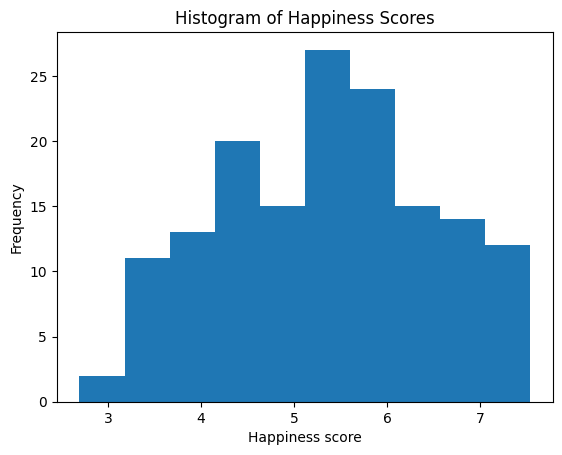

In [9]:
happiness_hist = df['Happiness Score'].plot(
    kind='hist',
    title = 'Histogram of Happiness Scores',
    xlabel = 'Happiness score',
    ylabel = 'Frequency'
)

Mi a szakadék a legboldogabb és legkevésbé boldog országok között?

Ebben a feladatban egy vízszintes oszlopdiagramot kell létrehoznia az első 10 és az alsó 10 ország kombinálásával.

A vízszintes oszlopdiagramnak:

     Készítsen egy pivot_df DataFrame-ből származó adatok felhasználásával
     Legyen a cím : Top and Bottom 10 Countries by Happiness Score
     Az X címke neve legyen a Happiness Score
     Az ország legyen az Y címke értéke
     A sávok színei legyenek ["piros", "kék"]
     Legyen (10, 6) az ábra méretének értéke

In [15]:
df.head(10)[['Country', 'Happiness Score']]

,Country,Happiness Score
0,Norway,7.537
1,Denmark,7.522
2,Iceland,7.504
3,Switzerland,7.494
4,Finland,7.469
5,Netherlands,7.377
6,Canada,7.316
7,New Zealand,7.314
8,Sweden,7.284
9,Australia,7.284


In [16]:
# Extract top and bottom 10 countries based on happiness score
top_10 = df.head(10)[['Country', 'Happiness Score']]
bottom_10 = df.tail(10)[['Country', 'Happiness Score']]

# Create a new column to differentiate between top and bottom countries
top_10['Type'] = 'Top'
bottom_10['Type'] = 'Bottom'

# Combine the two dataframes into one
combined = pd.concat([top_10, bottom_10])

# Pivot the dataframe to have country names as index and type as columns
pivot_df = combined.pivot(index='Country', columns='Type', values='Happiness Score')


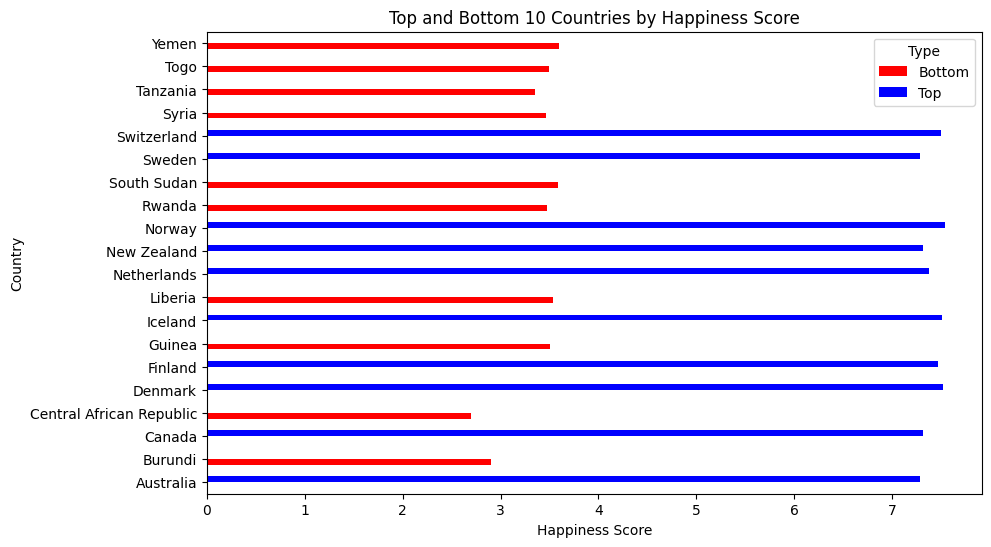

In [18]:
happiness_gap_chart = pivot_df.plot(kind='barh',
                color = ['red', 'blue'],
                figsize = (10,6),
                title = 'Top and Bottom 10 Countries by Happiness Score',
                xlabel = 'Happiness Score',
                ylabel = 'Country'
             )

Hozzájárul-e a nagylelkűség a boldogsághoz?

Ebben a feladatban egy vízszintes oszlopdiagramot kell létrehoznia, amelyen az első 5 és az alsó 5 ország együttesen nagyvonalúság szerint vannak rendezve.

A vízszintes oszlopdiagramnak:

     Építsen egy generosity_pivot_df DataFrame-ből származó adatok felhasználásával
     Happiness Score of Top and Bottom 5 Countries by Generosity  a cím
     Az X címke értéke legyen a Happiness Score
     Az Country legyen az Y címke értéke
     A sávok színei legyenek ["piros", "zöld"]
     Legyen (10, 6) az ábra méretének értéke


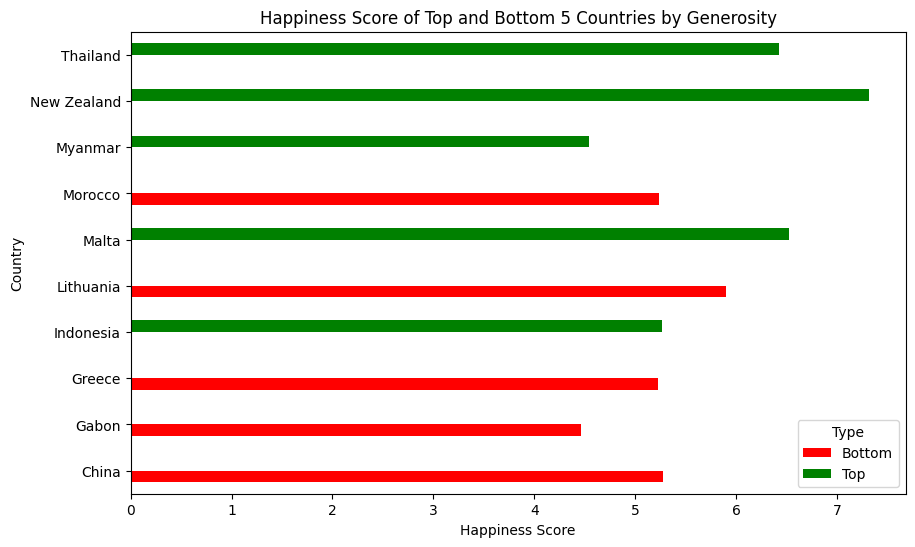

In [21]:
# Sort by generosity
df_by_generosity = df.sort_values('Generosity')[['Country', 'Happiness Score']]

# Extract top 5 and bottom 5 countries
top_5 = df_by_generosity.copy().tail(5)
bottom_5 = df_by_generosity.copy().head(5)

top_5.loc[:, 'Type'] = 'Top'
bottom_5.loc[:, 'Type'] = 'Bottom'

# Combine the two dataframes into one
combined = pd.concat([top_5, bottom_5])

# Pivot the dataframe to have country names as index and type as columns
generosity_pivot_df = combined.pivot(index='Country', columns='Type', values='Happiness Score')

# Write your code here
generosity_gap_chart = generosity_pivot_df.plot(kind='barh',
             color = ['red', 'green'],
             figsize = (10,6),
             title = 'Happiness Score of Top and Bottom 5 Countries by Generosity',
              xlabel = 'Happiness Score',
              ylabel = 'Country'
             )

Hozzájárul-e a boldogsághoz az egy főre jutó GDP vagy a várható egészséges élettartam?

Ebben a feladatban egy kördiagramot kell létrehoznia a GDP_vs_health_percent panda sorozattal.

A kördiagramnak:

     Készítsen egy GDP_vs_health_percent sorozat adatait
     Hozzájáruljon az egy főre jutó GDP-hez és a várható egészséges élettartamhoz a 10 legboldogabb ország ranglistájához
     Minden éken legyen látható százalékos érték
     Van egy címkéje a Melyik hozzájárul többet? érték
     Legyen ['yellowgreen', 'lightskyblue'] a torta szektorok színe
     Legyen 140 a kezdőszög értéke

In [ ]:
# Get the top 10 happiest countries
top_10 = df.head(10)

# Calculate the total contribution of GDP per capita and healthy life expectancy to the happiness score
total_gdp = top_10['Explained by: GDP per capita'].sum()
total_life_expectancy = top_10['Explained by: Healthy life expectancy'].sum()

# Calculate the percentage contribution of GDP per capita and healthy life expectancy to the happiness score
gdp_percent = total_gdp / (total_gdp + total_life_expectancy) * 100
life_expectancy_percent = total_life_expectancy / (total_gdp + total_life_expectancy) * 100


GDP_vs_health_percent = pd.Series([gdp_percent, life_expectancy_percent], index=['GDP per capita', 'Healthy life expectancy'])

# Write your code here
GDP_vs_health_pie = GDP_vs_health_percent.plot(kind="pie",
                                               label="Which contribute more?",
                                               title="Contribution of GDP per capita and healthy life expectancy to the happiness score of the top 10 happiest countries",
                                               autopct='%1.2f%%',
                                               colors=['yellowgreen', 'lightskyblue'],
                                               startangle=140)

Melyik tényező járul hozzá leginkább a boldogsághoz?

Ebben a feladatban egy kördiagramot kell létrehoznia a panda sorozat tényezők_százalékkal.

A kördiagramnak:

     Készítsen egy factor_percent sorozat adatait
     Készítsen százalékos bontást a boldogsághoz hozzájáruló tényezőkről
     Minden éken legyen látható százalékos érték
     Legyen egy üres címke

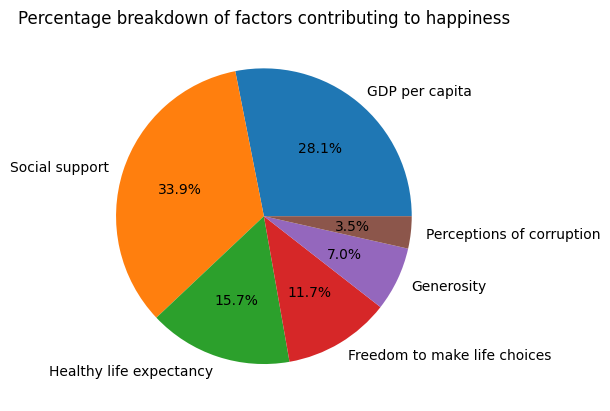

In [23]:
# Create a list of labels for the pie chart
labels = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Create a list of values of sums for the pie chart
values = df.iloc[:, 3:9].sum().tolist()

factors_percent = pd.Series(values, index=labels)

# Write your code here
factors_pie = factors_percent.plot(kind="pie",
                     label='',
                     title='Percentage breakdown of factors contributing to happiness',
                     autopct='%1.1f%%')


Milyen százalékban oszlik meg a különböző tényezők, amelyek hozzájárulnak a 10 legboldogabb országhoz?

Ebben a feladatban egy vízszintes halmozott oszlopdiagramot kell létrehoznia a .

A vízszintes halmozott oszlopdiagramnak:

     Építsen egy top_10_factors DataFrame-ből származó adatok felhasználásával
     Tényezők hozzájárulása a 10 legboldogabb ország címének boldogságpontszámához
     A tényezők halmozott sávokként jelennek meg
     A faktor pontszám legyen az X címke értéke
     Az Y címke értéke az országok


Text(0, 0.5, 'Countries')

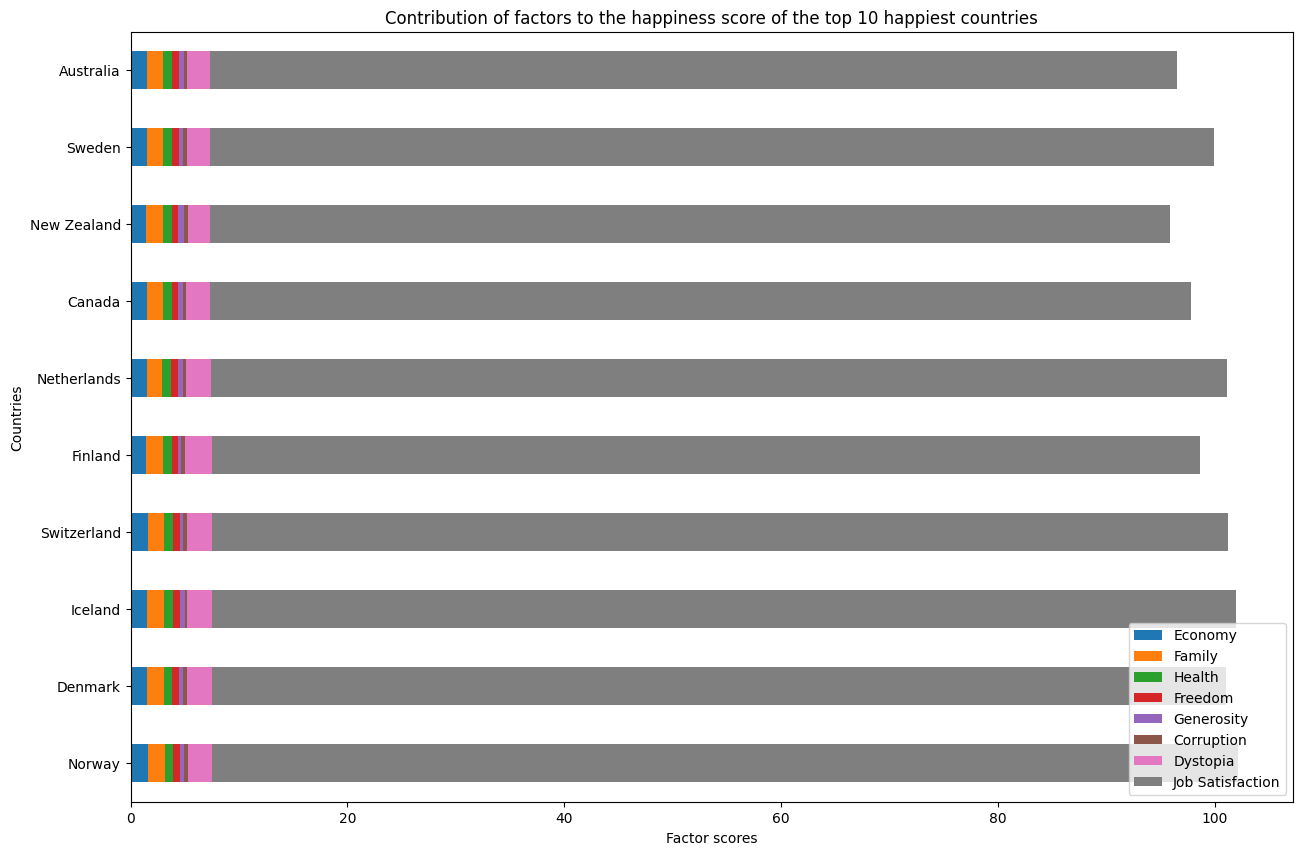

In [26]:
# Create a new dataframe with the top 10 happiest countries and their corresponding factor scores
top_10_factors = df.head(10).drop(['Happiness Rank', 'Happiness Score'], axis = 1)

# Set the index to the country column
top_10_factors.set_index('Country', inplace=True)

# Write your code here
top_10_factors_contribution_chart = top_10_factors.plot(kind='barh', stacked=True, figsize=(15, 10))

top_10_factors_contribution_chart.set_title("Contribution of factors to the happiness score of the top 10 happiest countries")
top_10_factors_contribution_chart.legend(loc='lower right')
top_10_factors_contribution_chart.set_xlabel("Factor scores")
top_10_factors_contribution_chart.set_ylabel("Countries")
